In [1]:
# if play the code in CoLab
import pandas as pd
import seaborn as sns
# from google.colab import files
import io
import warnings
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import re

warnings.filterwarnings(action='ignore')

In [2]:
# if play the code in CoLab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# if play the code in CoLab
%cd drive/My Drive/Colab Notebooks/인지프/프로젝트/ProTACT/tensorflow/training_data

/content/drive/My Drive/Colab Notebooks/인지프/프로젝트/ProTACT/tensorflow/training_data


In [3]:
def load_pickle_file(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
    return data

# 피클 파일 불러오기
#file_13 = 'training_data_epoch_13.pkl'
#file_26 = 'training_data_epoch_26.pkl'
file_50 = 'training_data_epoch_21.pkl'

#data_13 = load_pickle_file(file_13)
#data_26 = load_pickle_file(file_26)
data_50 = load_pickle_file(file_50)

In [4]:
print(len(data_50['epoch_times']))

21


In [5]:
# train_loss_1_50 = data_13['train_loss'] + data_26['train_loss'] + data_50['train_loss']
# val_loss_1_50 = data_13['val_loss'] + data_26['val_loss'] + data_50['val_loss']

# qwk_dev_1_50 = data_13['qwk_dev'] + data_26['qwk_dev'] + data_50['qwk_dev']
# qwk_test_1_50 = data_13['qwk_test'] + data_26['qwk_test'] + data_50['qwk_test']

# kappa_dev_history_1_50 = data_13['kappa_dev_history'] + data_26['kappa_dev_history'] + data_50['kappa_dev_history']
# kappa_test_history_1_50 = data_13['kappa_test_history'] + data_26['kappa_test_history'] + data_50['kappa_test_history']

train_loss_1_50 = data_50['train_loss']
val_loss_1_50 = data_50['val_loss']

qwk_dev_1_50 = data_50['qwk_dev']
qwk_test_1_50 = data_50['qwk_test']

kappa_dev_history_1_50 = data_50['kappa_dev_history']
kappa_test_history_1_50 = data_50['kappa_test_history']

In [6]:
print(len(train_loss_1_50))

21


In [8]:
# # 데이터 수집
# epoch_times_1_13 = data_13['epoch_times']
# epoch_times_14_26 = data_26['epoch_times']
# epoch_times_27_50 = data_50['epoch_times']

# # 평균 에포크 시간 계산
# average_epoch_time_1_13 = np.mean(epoch_times_1_13)
# average_epoch_time_14_26 = np.mean(epoch_times_14_26)
# average_epoch_time_27_50 = np.mean(epoch_times_27_50)

# print("GRU")
# print(f'Average epoch time (1-13)-CPU: {average_epoch_time_1_13:.3f} seconds')
# print(f'Average epoch time (14-26)-CPU: {average_epoch_time_14_26:.3f} seconds')
# print(f'Average epoch time (27-50)-T4: {average_epoch_time_27_50:.3f} seconds')

epoch_times_1_50 = data_50['epoch_times']

average_epoch_time_1_50 = np.mean(epoch_times_1_50)

print("transformer encoder")
print(f'Average epoch time (1-50): {average_epoch_time_1_50:.3f} seconds')

transformer encoder
Average epoch time (1-50): 165.588 seconds


In [9]:
# 그래프를 저장할 디렉토리 생성
images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

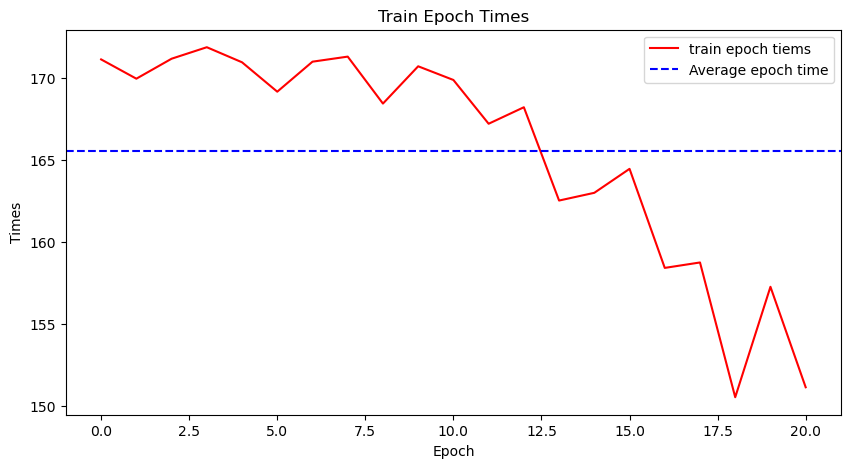

In [10]:
# train epoch time
plt.figure(figsize=(10, 5))
plt.plot(epoch_times_1_50, 'r', label='train epoch tiems')
# plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
# plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
plt.axhline(y=average_epoch_time_1_50, color='b', linestyle='--', label='Average epoch time')
plt.xlabel('Epoch')
plt.ylabel('Times')
plt.title('Train Epoch Times')
plt.legend()
plt.savefig(os.path.join(images_dir, 'train_epoch_times_curve.png'))
plt.show()

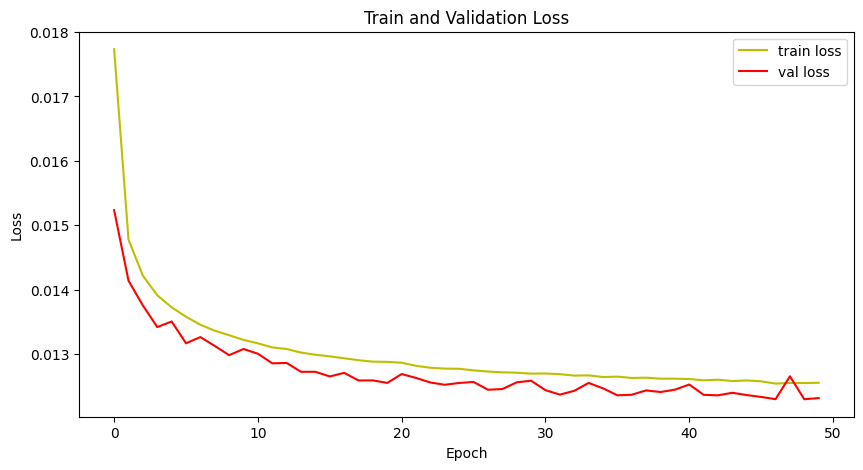

In [11]:
# train_loss와 val_loss 그래프 곡선
plt.figure(figsize=(10, 5))
plt.plot(train_loss_1_50, 'y', label='train loss')
plt.plot(val_loss_1_50, 'r', label='val loss')
# plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
# plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.savefig(os.path.join(images_dir, 'train_val_loss_curve.png'))
plt.show()

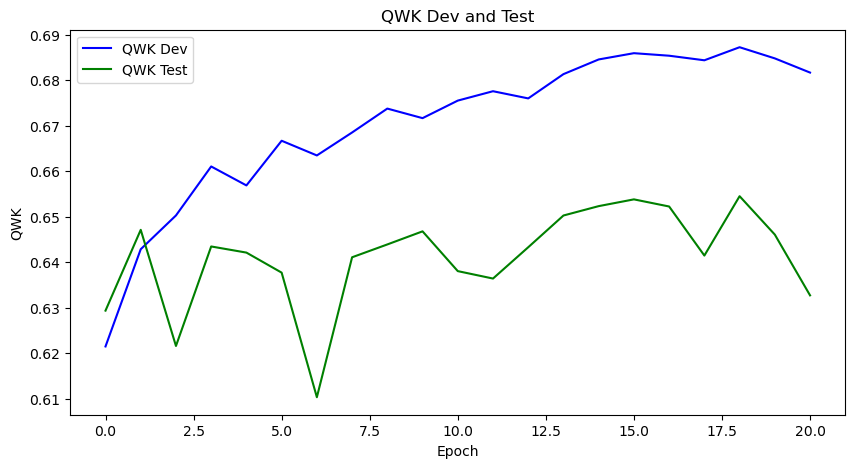

In [11]:
# qwk_dev와 qwk_test 그래프 곡선
plt.figure(figsize=(10, 5))
plt.plot(qwk_dev_1_50, 'b', label='QWK Dev')
plt.plot(qwk_test_1_50, 'g', label='QWK Test')
# plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
# plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
plt.xlabel('Epoch')
plt.ylabel('QWK')
plt.title('QWK Dev and Test')
plt.legend()
plt.savefig(os.path.join(images_dir, 'qwk_dev_test_curve.png'))
plt.show()

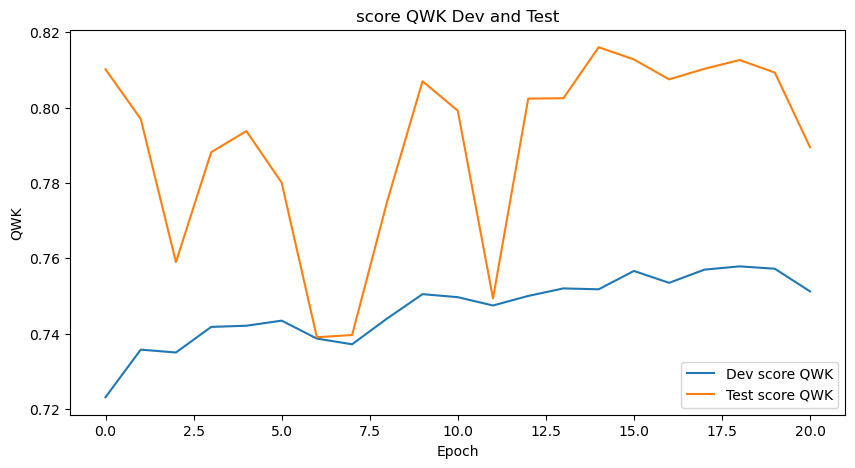

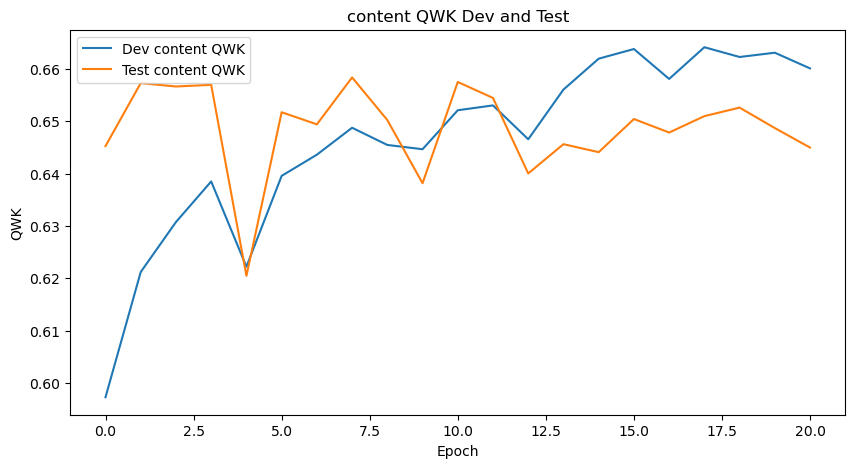

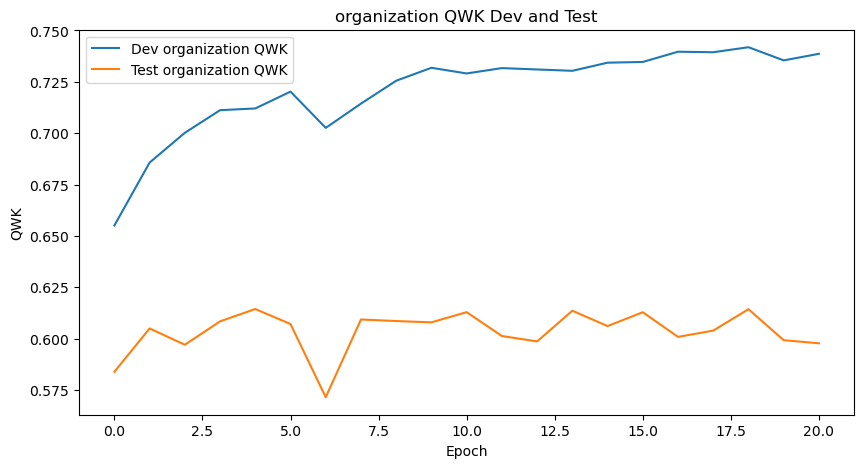

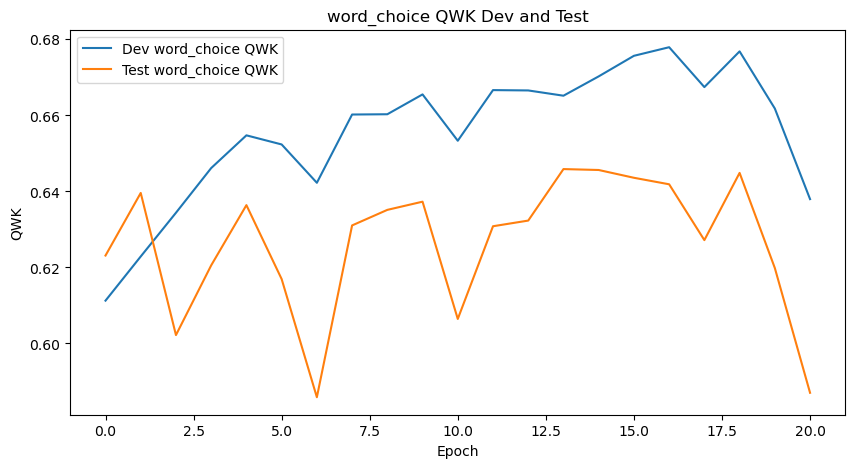

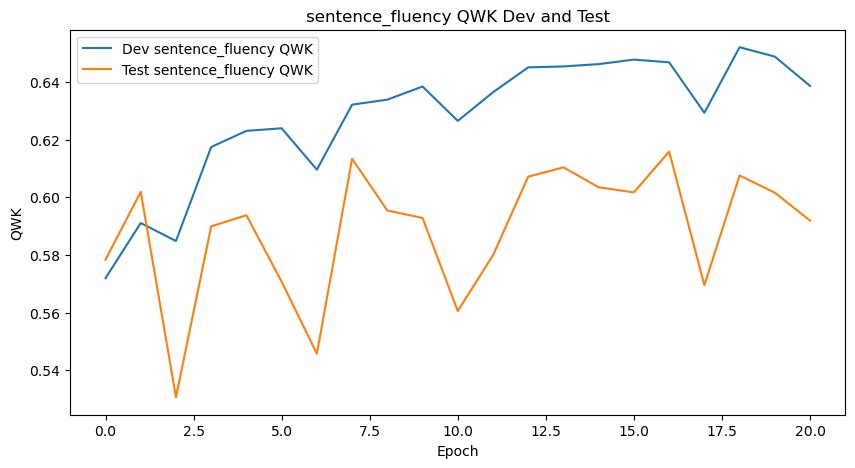

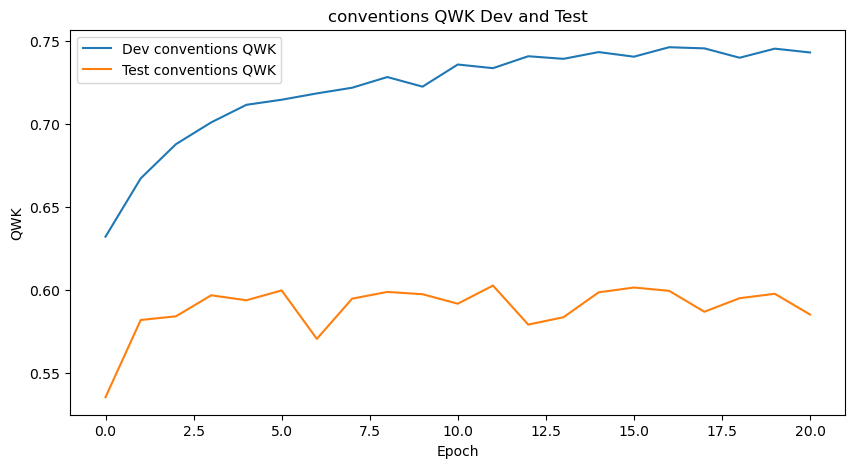

In [12]:
# kappa_dev_history와 kappa_test_history의 각 세부 값들의 변화 곡선
# 각 속성에 대해 kappa_dev_history와 kappa_test_history의 그래프를 생성
for key in kappa_test_history_1_50[0].keys():
    dev_values = [kappa[key] for kappa in kappa_dev_history_1_50]
    test_values = [kappa[key] for kappa in kappa_test_history_1_50]

    plt.figure(figsize=(10, 5))
    plt.plot(dev_values, label=f'Dev {key} QWK')
    plt.plot(test_values, label=f'Test {key} QWK')
    # plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
    # plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
    plt.xlabel('Epoch')
    plt.ylabel('QWK')
    plt.title(f'{key} QWK Dev and Test')
    plt.legend()
    plt.savefig(os.path.join(images_dir, f'{key}_qwk_dev_test_curve.png'))
    plt.show()

In [ ]:
combined_data = {
    'epoch_times': epoch_times_1_13 + epoch_times_14_26 + epoch_times_27_50,
    'train_loss': train_loss_1_50,
    'val_loss': val_loss_1_50,
    'qwk_dev': qwk_dev_1_50,
    'qwk_test': qwk_test_1_50,
    'kappa_dev_history': kappa_dev_history_1_50,
    'kappa_test_history': kappa_test_history_1_50
}


In [ ]:
print(len(combined_data['kappa_dev_history']))

50


In [ ]:
with open('training_data_epoch_1_50.pkl', 'wb') as f:
    pickle.dump(combined_data, f)

print("Combined data saved as 'combined_training_data_epoch_1_50.pkl'")

Combined data saved as 'combined_training_data_epoch_1_50.pkl'


In [ ]:
# 불러올 파일 경로
combined_file = 'training_data_epoch_1_50.pkl'

# 파일 불러오기
combined_data = load_pickle_file(combined_file)

# 데이터 확인
epoch_times = combined_data['epoch_times']
train_loss = combined_data['train_loss']
val_loss = combined_data['val_loss']
qwk_dev = combined_data['qwk_dev']
qwk_test = combined_data['qwk_test']
kappa_dev_history = combined_data['kappa_dev_history']
kappa_test_history = combined_data['kappa_test_history']


In [ ]:
# 데이터 길이 확인
print(f'Epoch times: {len(epoch_times)}')
print(f'Train loss: {len(train_loss)}')
print(f'Val loss: {len(val_loss)}')
print(f'QWK Dev: {len(qwk_dev)}')
print(f'QWK Test: {len(qwk_test)}')
print(f'Kappa Dev History: {len(kappa_dev_history)}')
print(f'Kappa Test History: {len(kappa_test_history)}')


Epoch times: 50
Train loss: 50
Val loss: 50
QWK Dev: 50
QWK Test: 50
Kappa Dev History: 50
Kappa Test History: 50


In [ ]:
# 데이터 일부 확인
print(f'Epoch times: {epoch_times[26:28]}')
print(f'Train loss: {train_loss[26:28]}')
print(f'Val loss: {val_loss[26:28]}')
print(f'QWK Dev: {qwk_dev[26:28]}')
print(f'QWK Test: {qwk_test[26:28]}')
print(f'Kappa Dev History: {kappa_dev_history[26:28]}')
print(f'Kappa Test History: {kappa_test_history[26:28]}')

Epoch times: [260.35242533683777, 135.84250354766846]
Train loss: [0.012731757946312428, 0.012729078531265259]
Val loss: [0.012677364982664585, 0.012512481771409512]
QWK Dev: [0.6892101622911531, 0.6934367851531174]
QWK Test: [0.6490933999576395, 0.6542095896279752]
Kappa Dev History: [{'score': 0.7562097968096401, 'content': 0.6651204290061938, 'organization': 0.7358060227269168, 'word_choice': 0.6773198739358792, 'sentence_fluency': 0.6583782678119259, 'conventions': 0.745429084100593, 'prompt_adherence': 0.6475163942118265, 'language': 0.652633694316084, 'narrativity': 0.664477897701318}, {'score': 0.7613925169097157, 'content': 0.672238787936636, 'organization': 0.7420242552576235, 'word_choice': 0.6771179150627319, 'sentence_fluency': 0.6610962135227281, 'conventions': 0.7483113851982788, 'prompt_adherence': 0.6516078029287045, 'language': 0.6565413040136534, 'narrativity': 0.670600885547985}]
Kappa Test History: [{'score': 0.8208541837179858, 'content': 0.6270865747433703, 'organ

In [ ]:
epoch_times_1_13 = epoch_times[:12]
epoch_times_14_26 = epoch_times[12:26]
epoch_times_27_50 = epoch_times[26:]

print(np.mean(epoch_times_1_13))
print(np.mean(epoch_times_14_26))
print(np.mean(epoch_times_27_50))

1393.087406039238
1556.3449219294957
143.65682897965112


In [20]:
combined_file_old = 'training_data_epoch_1_50.pkl'
new_file = 'training_data_epoch_50.pkl'

# 파일 불러오기
combined_data_old = load_pickle_file(combined_file_old)
new_data = load_pickle_file(new_file)

In [29]:
# 데이터 확인
def find_best_epoch_and_value(data, key=None, best_fn=max, best_fn_type='max'):
    if key is not None:
        values = [epoch_data[key] for epoch_data in data]
    else:
        values = data
    if best_fn_type == 'min':
        best_epoch = np.argmin(values)
    else:
        best_epoch = np.argmax(values)
    best_value = values[best_epoch]
    return best_epoch, best_value

def print_comparison(old_best, new_best, feature):
    print(f"{feature} - Old: Epoch {old_best[0]+1}, Value: {old_best[1]}")
    print(f"{feature} - New: Epoch {new_best[0]+1}, Value: {new_best[1]}")
    print()

In [31]:
# 비교할 키 목록
keys = ['train_loss', 'val_loss', 'qwk_dev', 'qwk_test']
kappa_keys = list(new_data['kappa_test_history'][0].keys())

# 비교 결과 저장할 딕셔너리
comparison_results = {}

In [33]:
# train_loss와 val_loss 비교 (최소값)
for key in keys[:2]:
    old_best = find_best_epoch_and_value(combined_data_old[key], best_fn=min, best_fn_type='min')
    new_best = find_best_epoch_and_value(new_data[key], best_fn=min, best_fn_type='min')
    comparison_results[key] = {'old': old_best, 'new': new_best}
    print_comparison(old_best, new_best, key)

train_loss - Old: Epoch 49, Value: 0.012540975585579872
train_loss - New: Epoch 47, Value: 0.012541513890028

val_loss - Old: Epoch 46, Value: 0.012301243841648102
val_loss - New: Epoch 49, Value: 0.012298996560275555



In [34]:
# qwk_dev와 qwk_test 비교 (최대값)
for key in keys[2:]:
    old_best = find_best_epoch_and_value(combined_data_old[key], best_fn=max, best_fn_type='max')
    new_best = find_best_epoch_and_value(new_data[key], best_fn=max, best_fn_type='max')
    comparison_results[key] = {'old': old_best, 'new': new_best}
    print_comparison(old_best, new_best, key)

qwk_dev - Old: Epoch 49, Value: 0.6985888273771208
qwk_dev - New: Epoch 50, Value: 0.699478082000642

qwk_test - Old: Epoch 15, Value: 0.6579871573340612
qwk_test - New: Epoch 22, Value: 0.6559476451733547



In [35]:
# kappa_dev_history와 kappa_test_history의 각 세부 특성 비교 (최대값)
for kappa_key in kappa_keys:
    old_dev_best = find_best_epoch_and_value(combined_data_old['kappa_dev_history'], kappa_key, best_fn=max, best_fn_type='max')
    new_dev_best = find_best_epoch_and_value(new_data['kappa_dev_history'], kappa_key, best_fn=max, best_fn_type='max')
    comparison_results[f'kappa_dev_{kappa_key}'] = {'old': old_dev_best, 'new': new_dev_best}
    print_comparison(old_dev_best, new_dev_best, f'kappa_dev_{kappa_key}')

    old_test_best = find_best_epoch_and_value(combined_data_old['kappa_test_history'], kappa_key, best_fn=max, best_fn_type='max')
    new_test_best = find_best_epoch_and_value(new_data['kappa_test_history'], kappa_key, best_fn=max, best_fn_type='max')
    comparison_results[f'kappa_test_{kappa_key}'] = {'old': old_test_best, 'new': new_test_best}
    print_comparison(old_test_best, new_test_best, f'kappa_test_{kappa_key}')

kappa_dev_score - Old: Epoch 42, Value: 0.7629316385791804
kappa_dev_score - New: Epoch 40, Value: 0.7622272965659082

kappa_test_score - Old: Epoch 28, Value: 0.8228870191658239
kappa_test_score - New: Epoch 22, Value: 0.8224253874405401

kappa_dev_content - Old: Epoch 49, Value: 0.6758617113707079
kappa_dev_content - New: Epoch 40, Value: 0.6780611909889951

kappa_test_content - Old: Epoch 9, Value: 0.6590289960423541
kappa_test_content - New: Epoch 9, Value: 0.6590289960423541

kappa_dev_organization - Old: Epoch 50, Value: 0.7524346111316569
kappa_dev_organization - New: Epoch 42, Value: 0.751266540447173

kappa_test_organization - Old: Epoch 14, Value: 0.6183459231856846
kappa_test_organization - New: Epoch 10, Value: 0.6173554629311966

kappa_dev_word_choice - Old: Epoch 43, Value: 0.6922983978717676
kappa_dev_word_choice - New: Epoch 49, Value: 0.6940080954415222

kappa_test_word_choice - Old: Epoch 10, Value: 0.6457348921019396
kappa_test_word_choice - New: Epoch 15, Value: 0.6

In [36]:
# 시간 비교
epoch_times_old = combined_data_old['epoch_times']
epoch_times_new = new_data['epoch_times']

old_best_time_epoch, old_best_time_value = find_best_epoch_and_value(epoch_times_old, best_fn=min, best_fn_type='min')
new_best_time_epoch, new_best_time_value = find_best_epoch_and_value(epoch_times_new, best_fn=min, best_fn_type='min')

print(f"Best Time - Old: Epoch {old_best_time_epoch+1}, Value: {old_best_time_value}")
print(f"Best Time - New: Epoch {new_best_time_epoch+1}, Value: {new_best_time_value}")

Best Time - Old: Epoch 37, Value: 135.14814591407776
Best Time - New: Epoch 27, Value: 140.25899410247803


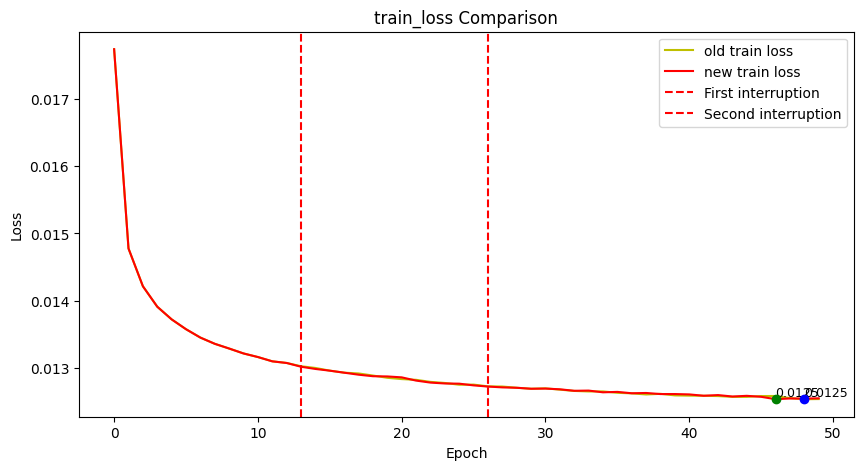

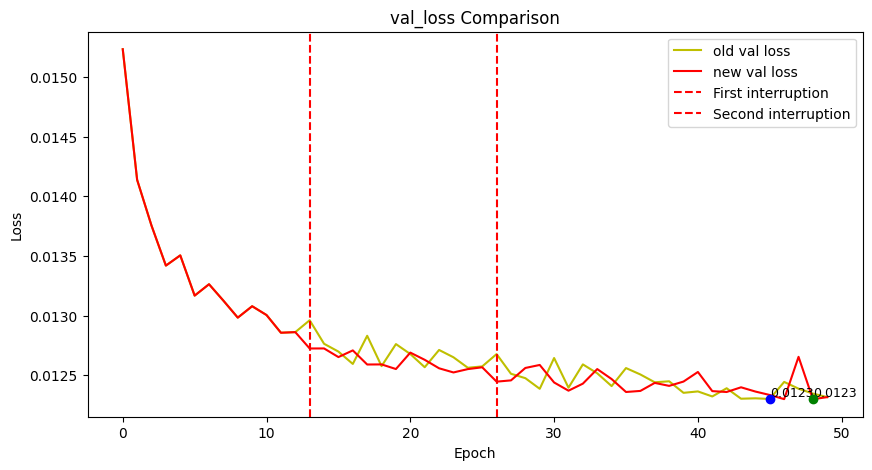

In [37]:
# train_loss와 val_loss 그래프 곡선 (최소값 표시)
for key in ['train_loss', 'val_loss']:
    old_best_epoch, old_best_value = find_best_epoch_and_value(combined_data_old[key], best_fn=min, best_fn_type='min')
    new_best_epoch, new_best_value = find_best_epoch_and_value(new_data[key], best_fn=min, best_fn_type='min')

    plt.figure(figsize=(10, 5))
    plt.plot(combined_data_old[key], 'y', label='old train loss' if key == 'train_loss' else 'old val loss')
    plt.plot(new_data[key], 'r', label='new train loss' if key == 'train_loss' else 'new val loss')
    plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
    plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
    plt.scatter(old_best_epoch, old_best_value, color='blue', zorder=5)
    plt.text(old_best_epoch, old_best_value, f'{old_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.scatter(new_best_epoch, new_best_value, color='green', zorder=5)
    plt.text(new_best_epoch, new_best_value, f'{new_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{key} Comparison')
    plt.legend()
    plt.savefig(os.path.join(images_dir, f'{key}_comparison.png'))
    plt.show()

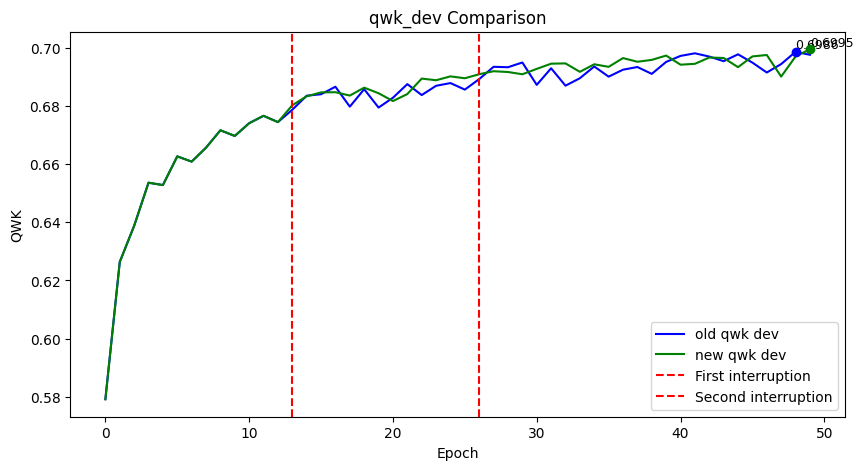

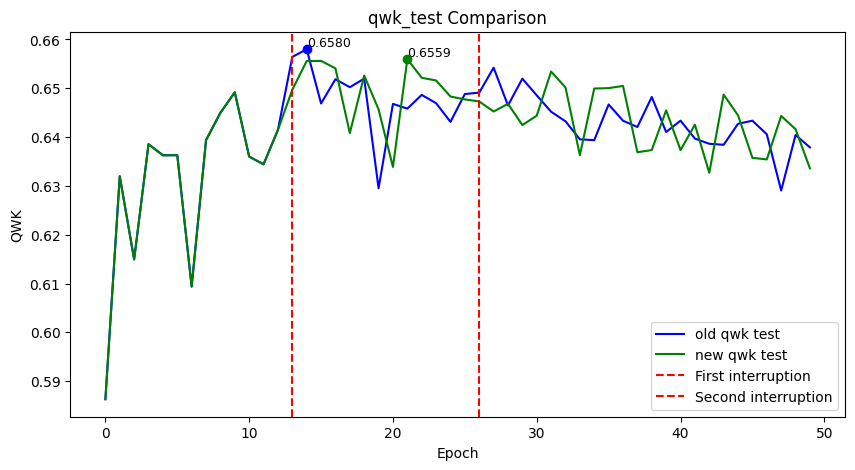

In [38]:
# qwk_dev와 qwk_test 그래프 곡선 (최대값 표시)
for key in ['qwk_dev', 'qwk_test']:
    old_best_epoch, old_best_value = find_best_epoch_and_value(combined_data_old[key], best_fn=max, best_fn_type='max')
    new_best_epoch, new_best_value = find_best_epoch_and_value(new_data[key], best_fn=max, best_fn_type='max')

    plt.figure(figsize=(10, 5))
    plt.plot(combined_data_old[key], 'b', label='old qwk dev' if key == 'qwk_dev' else 'old qwk test')
    plt.plot(new_data[key], 'g', label='new qwk dev' if key == 'qwk_dev' else 'new qwk test')
    plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
    plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
    plt.scatter(old_best_epoch, old_best_value, color='blue', zorder=5)
    plt.text(old_best_epoch, old_best_value, f'{old_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.scatter(new_best_epoch, new_best_value, color='green', zorder=5)
    plt.text(new_best_epoch, new_best_value, f'{new_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.xlabel('Epoch')
    plt.ylabel('QWK')
    plt.title(f'{key} Comparison')
    plt.legend()
    plt.savefig(os.path.join(images_dir, f'{key}_comparison.png'))
    plt.show()

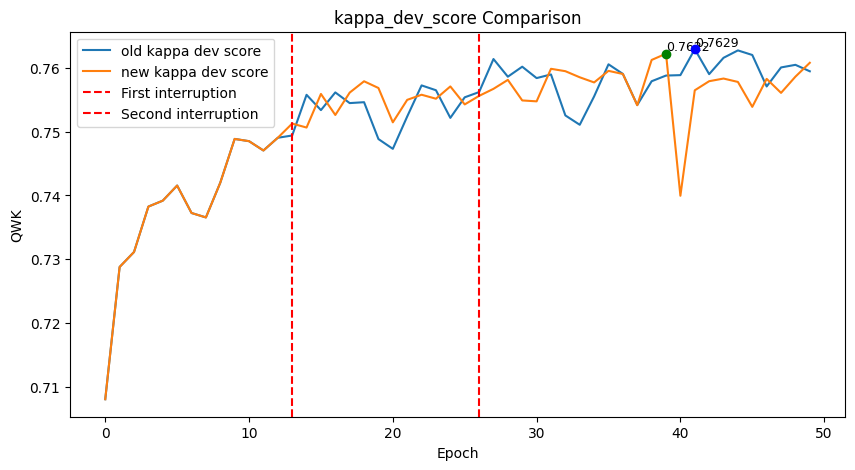

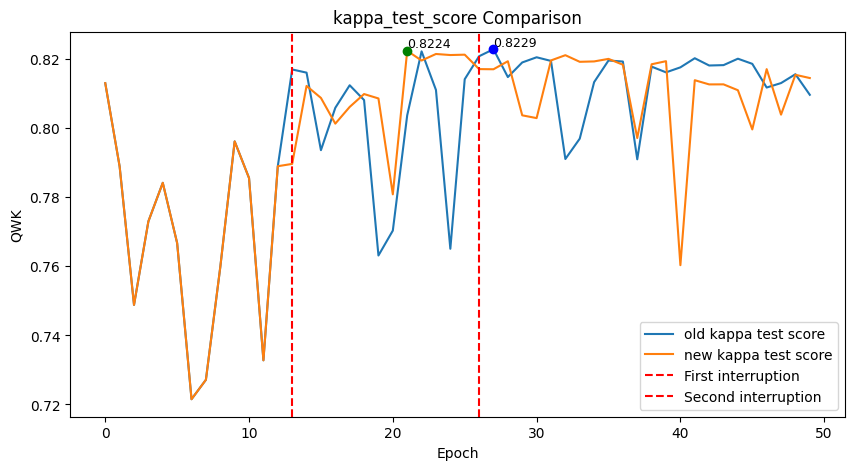

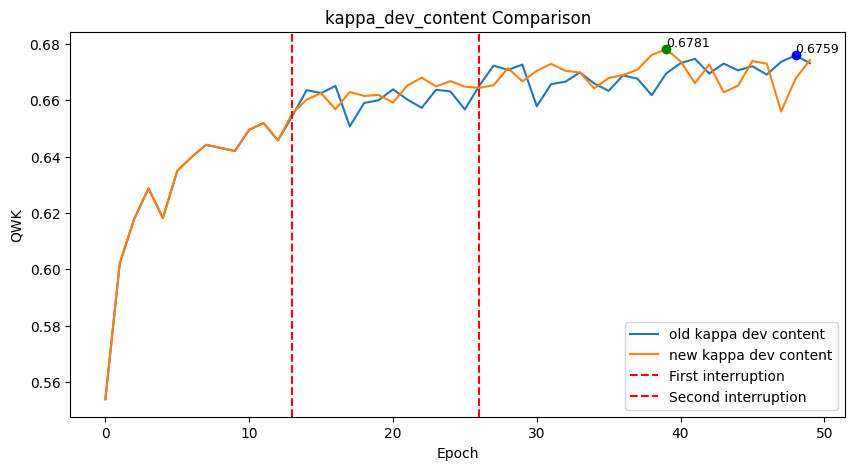

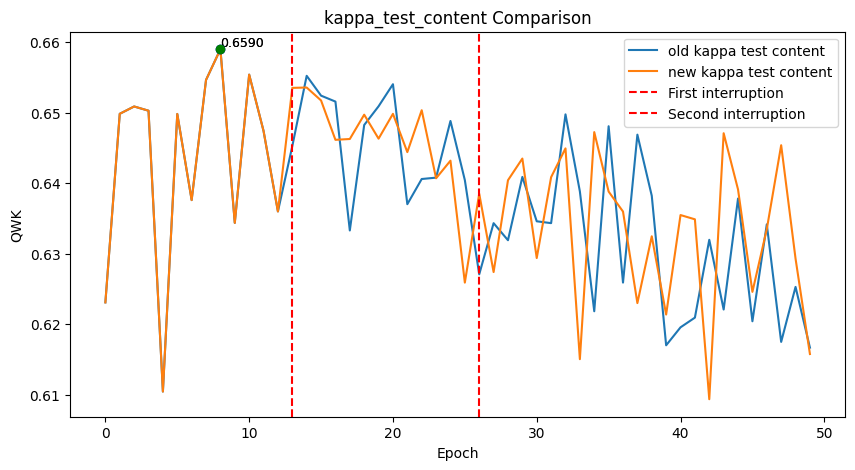

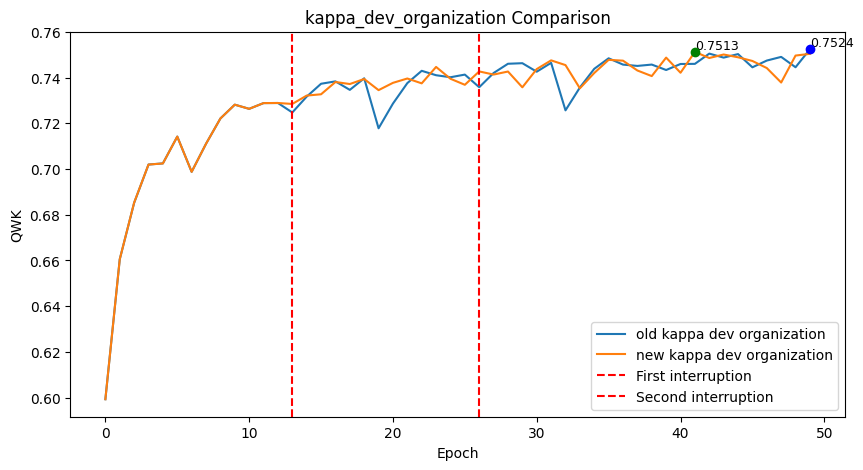

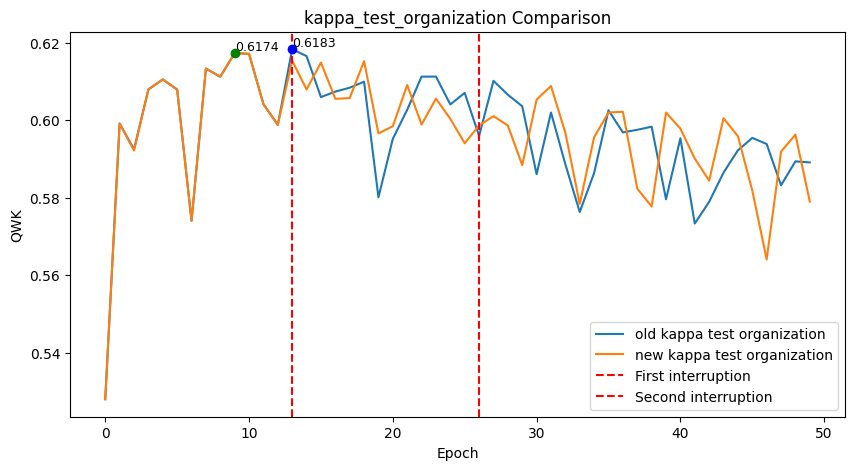

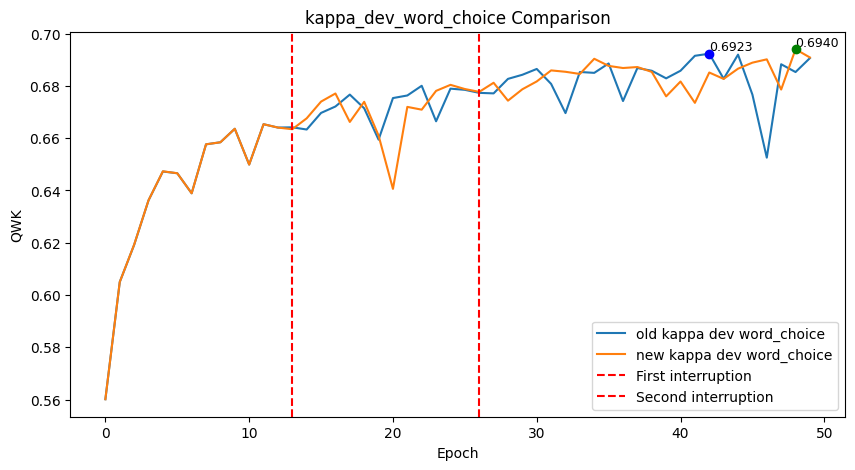

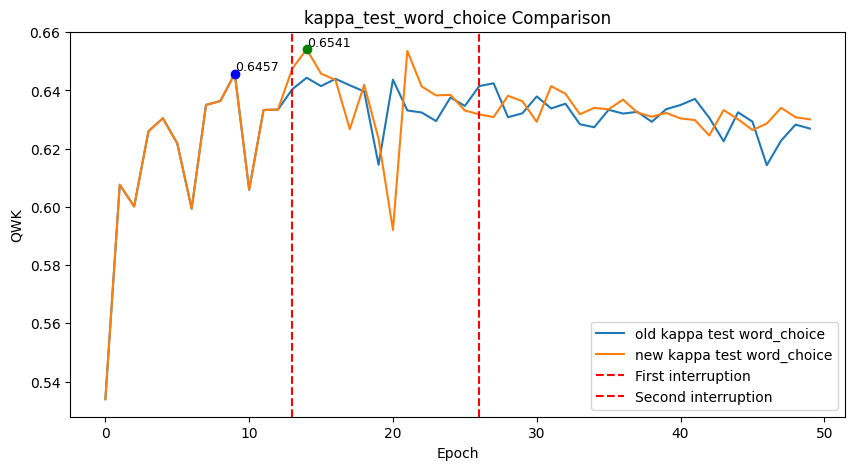

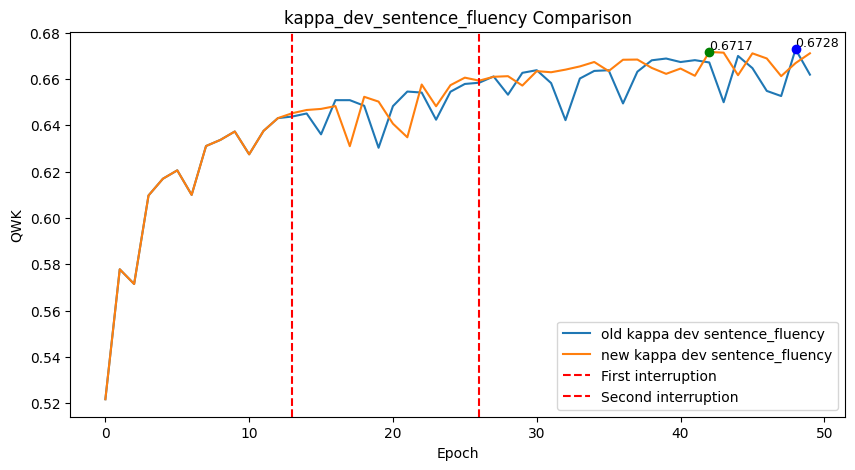

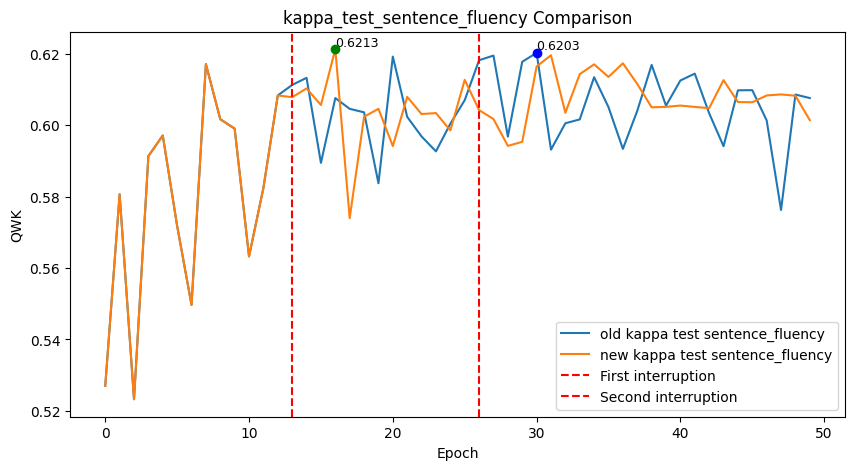

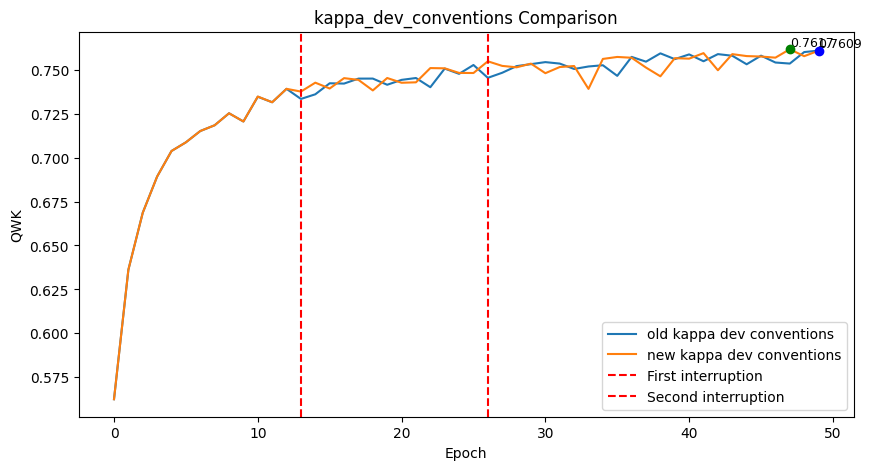

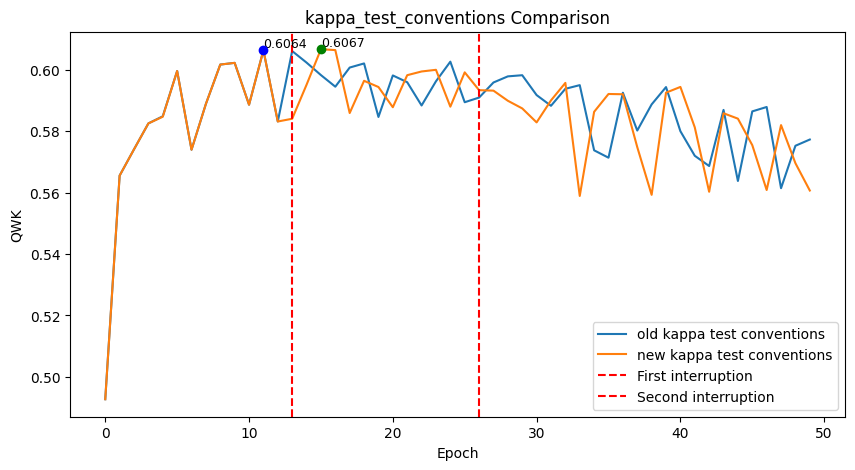

In [39]:
# kappa_dev_history와 kappa_test_history의 각 세부 특성 비교 (최대값 표시)
kappa_keys = list(new_data['kappa_test_history'][0].keys())

for kappa_key in kappa_keys:
    old_dev_best_epoch, old_dev_best_value = find_best_epoch_and_value(combined_data_old['kappa_dev_history'], kappa_key, best_fn=max, best_fn_type='max')
    new_dev_best_epoch, new_dev_best_value = find_best_epoch_and_value(new_data['kappa_dev_history'], kappa_key, best_fn=max, best_fn_type='max')

    plt.figure(figsize=(10, 5))
    plt.plot([epoch_data[kappa_key] for epoch_data in combined_data_old['kappa_dev_history']], label=f'old kappa dev {kappa_key}')
    plt.plot([epoch_data[kappa_key] for epoch_data in new_data['kappa_dev_history']], label=f'new kappa dev {kappa_key}')
    plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
    plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
    plt.scatter(old_dev_best_epoch, old_dev_best_value, color='blue', zorder=5)
    plt.text(old_dev_best_epoch, old_dev_best_value, f'{old_dev_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.scatter(new_dev_best_epoch, new_dev_best_value, color='green', zorder=5)
    plt.text(new_dev_best_epoch, new_dev_best_value, f'{new_dev_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.xlabel('Epoch')
    plt.ylabel('QWK')
    plt.title(f'kappa_dev_{kappa_key} Comparison')
    plt.legend()
    plt.savefig(os.path.join(images_dir, f'kappa_dev_{kappa_key}_comparison.png'))
    plt.show()

    old_test_best_epoch, old_test_best_value = find_best_epoch_and_value(combined_data_old['kappa_test_history'], kappa_key, best_fn=max, best_fn_type='max')
    new_test_best_epoch, new_test_best_value = find_best_epoch_and_value(new_data['kappa_test_history'], kappa_key, best_fn=max, best_fn_type='max')

    plt.figure(figsize=(10, 5))
    plt.plot([epoch_data[kappa_key] for epoch_data in combined_data_old['kappa_test_history']], label=f'old kappa test {kappa_key}')
    plt.plot([epoch_data[kappa_key] for epoch_data in new_data['kappa_test_history']], label=f'new kappa test {kappa_key}')
    plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
    plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
    plt.scatter(old_test_best_epoch, old_test_best_value, color='blue', zorder=5)
    plt.text(old_test_best_epoch, old_test_best_value, f'{old_test_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.scatter(new_test_best_epoch, new_test_best_value, color='green', zorder=5)
    plt.text(new_test_best_epoch, new_test_best_value, f'{new_test_best_value:.4f}', fontsize=9, verticalalignment='bottom')
    plt.xlabel('Epoch')
    plt.ylabel('QWK')
    plt.title(f'kappa_test_{kappa_key} Comparison')
    plt.legend()
    plt.savefig(os.path.join(images_dir, f'kappa_test_{kappa_key}_comparison.png'))
    plt.show()